In [1]:
import pandas as pd
import numpy as np
import scipy
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt


def read_csv_to_ndarray(filename):
    # read csv file to ndarray
    read = pd.read_csv(filename)
    target_ndarray = read.values
    target_ndarray_x = np.delete(target_ndarray, 0, 1)
    target_ndarray_y = target_ndarray_x[:, 0]
    target_ndarray_x = np.delete(target_ndarray_x, 0, 1)
    return target_ndarray_x, target_ndarray_y.T

First we introduce Naive Bayes Classifier， Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. There is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable. For example, a fruit may be considered to be an apple if it is red, round, and about 10 cm in diameter. A naive Bayes classifier considers each of these features to contribute independently to the probability that this fruit is an apple, regardless of any possible correlations between the color, roundness, and diameter features.（From Wikipedia）

We implement a naive bayes classifier ourselves to make prediction on part of the pre-game data.

# Naive Bayes Classifier

In [2]:
import math
import re

class Bayes_Classifier:

    def __init__(self):
        pass


    def train(self, lines, result):

        champion_dict_0 = {}
        champion_dict_1 = {}
        self.champion_dict = {}
        self.count0 = 0
        self.count1 = 0
        self.c0 = 0
        self.c1 = 0
        for i in range(0, len(lines)):


            words = lines[i]



            if result[i] == 1:
                self.c1 += 1

                for j in words:


                    self.count1 += 1
                    if j in self.champion_dict:
                        self.champion_dict[j] = self.champion_dict[j] + 1
                    elif j not in self.champion_dict:
                        self.champion_dict[j] = 1
                    if j in champion_dict_1:
                        champion_dict_1[j] = champion_dict_1[j] + 1
                    elif j not in champion_dict_1:
                        champion_dict_1[j] = 1

            if result[i] == 0:
                self.c0 += 1

                for j in words:
                    self.count0 += 1

                    if j in self.champion_dict:
                        self.champion_dict[j] = self.champion_dict[j] + 1
                    elif j not in self.champion_dict:
                        self.champion_dict[j] = 1
                    if j in champion_dict_0:
                        champion_dict_0[j] = champion_dict_0[j] + 1
                    elif j not in champion_dict_0:
                        champion_dict_0[j] = 1

        self.keys_0 = champion_dict_0.keys()
        self.keys_1 = champion_dict_1.keys()

        w1= len(self.champion_dict)
        w2 = len(champion_dict_0)
        w3= len(champion_dict_1)
        self.featureset = {}
        for key in self.keys_0:


            p = (champion_dict_0[key] + 1) / (len(self.champion_dict) + self.count0)
            self.featureset[key, 0] = p

        for key in self.keys_1:
            p = (champion_dict_1[key] + 1) / (len(self.champion_dict) + self.count1)
            self.featureset[key, 1] = p

        pass







    def classify(self, lines1, lines2):

        prediction = []
        w0 = len(lines1)
        w1 = len(lines2)
        for i in range(0, len(lines1)):

            words1 = lines1[i]
            words2 = lines2[i]

            p1 = self.c1 / (self.c1 + self.c0)
            p0 = self.c0 / (self.c1 + self.c0)
            p1_1 = self.c1 / (self.c1 + self.c0)
            p0_1 = self.c0 / (self.c1 + self.c0)



            for word in range (0,len(words1)):


                if words1[word] not in self.keys_1:
                    self.featureset[words1[word], 1] = 1 / (len(self.champion_dict) + self.count1)
                if words1[word] not in self.keys_0:
                    self.featureset[words1[word], 0] = 1 / (len(self.champion_dict) + self.count0)
                if words2[word] not in self.keys_1:
                    self.featureset[words2[word], 1] = 1 / (len(self.champion_dict) + self.count1)
                if words2[word] not in self.keys_0:
                    self.featureset[words2[word], 0] = 1 / (len(self.champion_dict) + self.count0)


                if words1[word] in self.champion_dict.keys() and self.champion_dict[words1[word]] > 6 or words1[word] not in self.champion_dict.keys():
                    p1 = p1 + math.log(self.featureset[words1[word], 1])
                    p0 = p0 + math.log(self.featureset[words1[word], 0])

                if words2[word] in self.champion_dict.keys() and self.champion_dict[words2[word]] > 6 or words2[word] not in self.champion_dict.keys():
                    p1_1 = p1_1 + math.log(self.featureset[words2[word], 1])
                    p0_1 = p0_1 + math.log(self.featureset[words2[word], 0])





            if p1 >= p0:
                if p1_1 >= p0_1:
                    if p1_1 >= p1:
                        prediction.append(0)
                    else:
                        prediction.append(1)
                else:
                    prediction.append(1)


            else:
                if p0_1 >= p1_1:
                    if p0_1 >= p0:
                        prediction.append(1)
                    else:
                        prediction.append(0)
                else:
                    prediction.append(0)



        return prediction

# Pre-game data

In [3]:
data = read_csv_to_ndarray("pregame0_pregame1.csv")
pre_match_data = data[0]
pre_match_result = data[1]
champion1 = pre_match_data[:, 0:5]
champion2 = pre_match_data[:, 5:10]
level1 = pre_match_data[:, 10:15]
level2 = pre_match_data[:, 15:20]
level = level1 - level2

Besides using naive bayes classifier to make prediction on pre-game data, we also use KNN, Random Forest and Gradient Boosting Machine to predict the match result based on pre-game data, early-game data(data collected at 10 minutes after match begin) and in-game data(data collected at the end of the game).

# KNN:

K-Nearest Neighbors Algorithms is suitable for this problem, since our response variables include only 0 and 1 to indicate blue team winning or losing the game. The k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

In k-NN classification, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.(From Wikipedia)

# Random Forests

Random forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.Random decision forests correct for decision trees' habit of overfitting to their training set.(From Wikipedia)

To implement random forests, we need to decide the value of n_estimators, which is the number of trees in the forest.

# Gradient Boosting Machine

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.(From Wikipedia)

For gradient boosting, the number of weak learners (i.e. regression trees) is controlled by the parameter n_estimators. We need to adjust this parameter to get a better result.




# implement KNN, Bayes, Random Forest and Gradient Boosting Machine

KNN: 50 neighbors.

Random Forest: number of decision tree: 40

Gradient Boosting Machine: number of decision tree: 50

<Figure size 432x288 with 0 Axes>

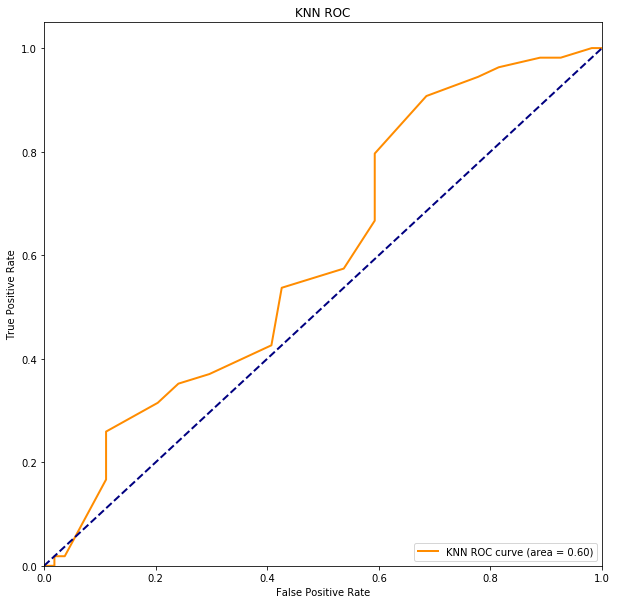

<Figure size 432x288 with 0 Axes>

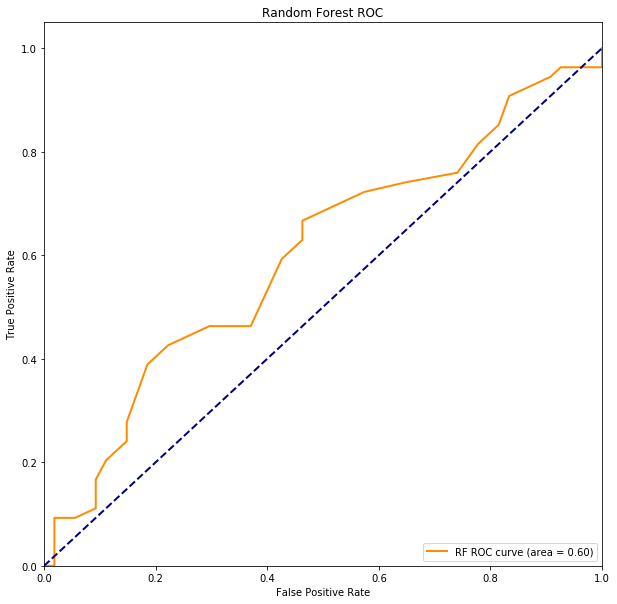

<Figure size 432x288 with 0 Axes>

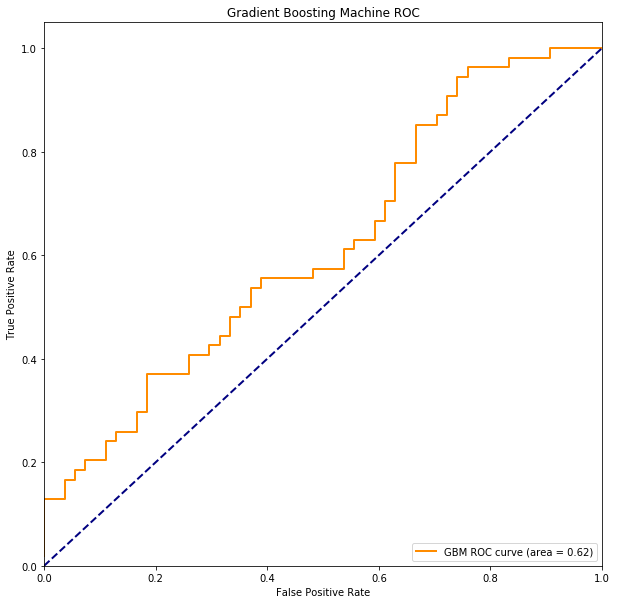

KNN Accuracy pregame: 0.5522592592592586
Bayes Accuracy pregame: 0.5196111111111104
Random Forest Accuracy pregame: 0.5610370370370363
Gradient Boosting Machine Accuracy pregame: 0.5789259259259255


In [4]:
knn_ans = 0
bayes_ans = 0
gbm_ans = 0
rf_ans = 0

knn = KNeighborsClassifier(n_neighbors=50)
rf = RandomForestClassifier(n_estimators=40, bootstrap=True, oob_score=True, criterion='gini')
gbm = GradientBoostingClassifier(n_estimators=50)



for i in range (0, 500):
    x_train, x_test, y_train, y_test = train_test_split(level, pre_match_result, test_size=0.1, random_state=i)
    x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(champion1, pre_match_result, test_size=0.1, random_state=i)
    x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(champion2, -pre_match_result + 1, test_size=0.1, random_state=i)

    x_train_bayes = np.vstack((x_train_1, x_train_2))
    y_train_bayes = np.hstack((y_train_1, y_train_2))
    x_test_bayes = np.vstack((x_test_1, x_test_2))
    y_test_bayes = np.vstack((y_test_1, y_test_2))

    classifier = Bayes_Classifier()
    classifier.train(x_train_bayes, y_train_bayes)
    predictions = classifier.classify(x_test_1, x_test_2)
    temp = 0
    for j in range (0, len(predictions)):
        if predictions[j] == y_test_1[j]:
            temp += 1

    bayes_score = temp / len(predictions)
    bayes_ans += bayes_score


    # knn
    knn.fit(x_train, y_train)
    knn_y_predict = knn.predict(x_test)
    knn_probility = knn.predict_proba(x_test)
    knn_score = knn.score(x_test,y_test,sample_weight=None)

    knn_ans += knn_score

    if i == 63:
        fpr, tpr, threshold = roc_curve(y_test, knn_probility[:, 1])  ###Calculate False Positive Rate and True Positive Rate
        roc_auc = auc(fpr, tpr)  ###Calculate Area Under Curve value

        plt.figure()
        lw = 2
        plt.figure(figsize=(10, 10))
        plt.plot(fpr, tpr, color='darkorange',
                 lw=lw, label='KNN ROC curve (area = %0.2f)' % roc_auc)  
        ###Set False Positive Rate as x-coordinate, True Positive Rate as y-coordinate, and then plot the curve
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('KNN ROC')
        plt.legend(loc="lower right")
        plt.show()


    # random forest
    rf.fit(x_train, y_train)
    rf_y_predict = rf.predict(x_test)
    rf_probility = rf.predict_proba(x_test)
    rf_score = rf.score(x_test, y_test, sample_weight=None)
    rf_ans += rf_score

    if i == 63:
        fpr, tpr, threshold = roc_curve(y_test, rf_probility[:, 1])  ###Calculate False Positive Rate and True Positive Rate
        roc_auc = auc(fpr, tpr)  ###Calculate Area Under Curve value

        plt.figure()
        lw = 2
        plt.figure(figsize=(10, 10))
        plt.plot(fpr, tpr, color='darkorange',
                 lw=lw, label='RF ROC curve (area = %0.2f)' % roc_auc)  
        ###Set False Positive Rate as x-coordinate, True Positive Rate as y-coordinate, and then plot the curve
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Random Forest ROC')
        plt.legend(loc="lower right")
        plt.show()

    #gradient boosting machine
    gbm.fit(x_train, y_train)
    y_gbm = gbm.predict(x_test)
    gbm_probility = gbm.predict_proba(x_test)
    gbm_score = gbm.score(x_test, y_test, sample_weight=None)
    gbm_ans += gbm_score

    if i == 63:
        fpr, tpr, threshold = roc_curve(y_test, gbm_probility[:, 1])  ###Calculate False Positive Rate and True Positive Rate
        roc_auc = auc(fpr, tpr)  ###Calculate Area Under Curve value

        plt.figure()
        lw = 2
        plt.figure(figsize=(10, 10))
        plt.plot(fpr, tpr, color='darkorange',
                 lw=lw, label='GBM ROC curve (area = %0.2f)' % roc_auc)  
        ###Set False Positive Rate as x-coordinate, True Positive Rate as y-coordinate, and then plot the curve
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Gradient Boosting Machine ROC')
        plt.legend(loc="lower right")
        plt.show()


knn_ans /= 500
bayes_ans /= 500
rf_ans /= 500
gbm_ans /= 500

print ('KNN Accuracy pregame:', knn_ans)
print ('Bayes Accuracy pregame:', bayes_ans)
print ('Random Forest Accuracy pregame:', rf_ans)
print ('Gradient Boosting Machine Accuracy pregame:', gbm_ans)

We collect 1077 matches as data, each match data contains pre-game data, including champions information, and champions mastery information, which means how well the player plays when using this champion. When calculate the accuracy, we pick 90% data are training set and 10% data as test set. We do this 500 times by randomly picking the test set to make the result more reliable.

First, we use naive bayes classifier to make predict on pre-game data. We only use one imformation in this method, which is the 10 champions used in the game. We all know that there are always some champions that is overbuffed. Players like to pick them and these champions have a higher winning rate. So we would like to know is this information related to the result of the match.  And the naive bayes method show a prediction accuracy of 51.96%. If we random guess a result for this match, it would be 50-50. So we can see that which champion to pick can influence the match result, but only a little. This actully makes sence, because the more important thing is whether a player can play well when using a champion, which is exactly we do using the rest of pre-game data.

Champions mastery informations is a integer that represent how well the player play when using the select champions. It is basicly calculate by the times the player using this champion. The value vary from several hundred to more than one million. The input feature is the difference of champions mastery of two player from different team in the same role. There are TOP, MID, JUG, SUP, and ADC in a team, so the input is 5-dimensional difference of mastery.

The KNN method shows a prediction accuracy of 55.23%, Random Forests shows a prediction accuracy of 56.10% and Gradient Boosting Machine shows a prediction accuracy of 57.89%. As I analyzed before, this feature is more important than the champions feature, because if two players of same role on diﬀerent teams have a big diﬀerence on their champions, the player who has a higher mastery level is more likely to win the line and more likely to lead to the overall victory. So it is reasonable that we get a better result on these three method. The Gradient Boosting Machine get an accuracy of 57.89%, which I think is an excellent result based on pre-game data.

We also draw ROC curves for each method, you can see this in the result.

# Early-Game Data

In [5]:
data = read_csv_to_ndarray("earlygame0_earlygame1.csv")
in_match = data[0]
in_match_result = data[1]


In [6]:
data[1]

array([1., 0., 1., ..., 0., 0., 1.])

# implement KNN, Random Forest and Gradient Boosting Machine

KNN: 500 neighbors

Random Forest: number of decision tree: 40

Gradient Boosting Machine: number of decision tree: 50

<Figure size 432x288 with 0 Axes>

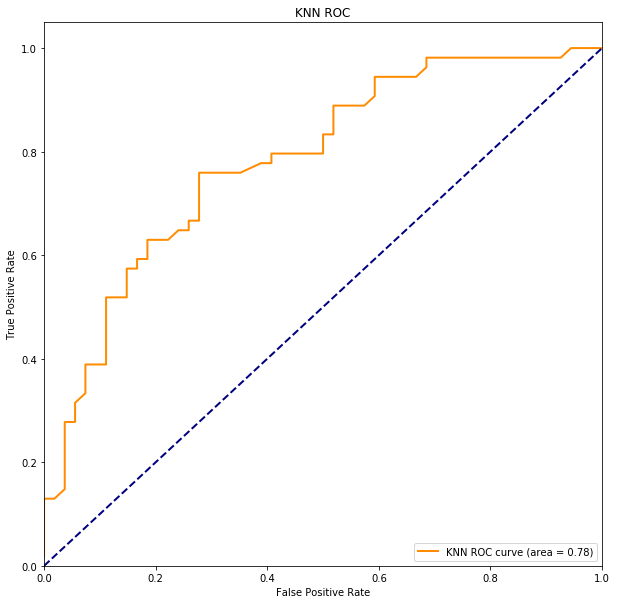

<Figure size 432x288 with 0 Axes>

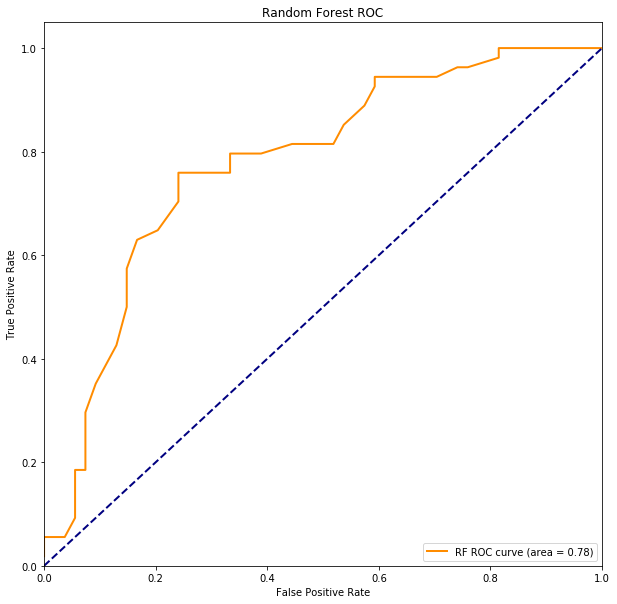

<Figure size 432x288 with 0 Axes>

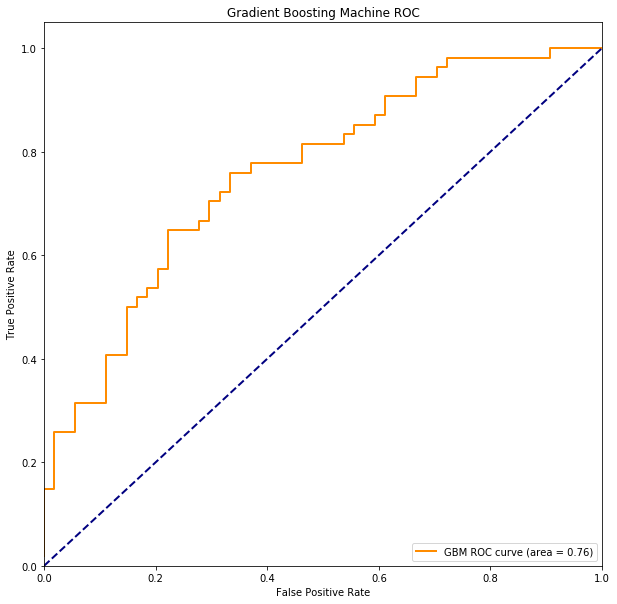

KNN Accuracy earlygame: 0.7205555555555553
Random Forest Accuracy earlygame: 0.7127777777777777
Gradient Boosting Machine Accuracy earlygame: 0.7110185185185185


In [7]:
knn_ans = 0
bayes_ans = 0
gbm_ans = 0
rf_ans = 0

knn = KNeighborsClassifier(n_neighbors=500)
rf = RandomForestClassifier(n_estimators=40, bootstrap=True, oob_score=True, criterion='gini')
gbm = GradientBoostingClassifier(n_estimators=50)


for i in range (0,100):
    x_train, x_test, y_train, y_test = train_test_split(in_match, in_match_result, test_size=0.1, random_state=i)
    # knn
    knn.fit(x_train, y_train)
    knn_y_predict = knn.predict(x_test)
    knn_probility = knn.predict_proba(x_test)
    knn_score = knn.score(x_test, y_test, sample_weight=None)
    knn_ans += knn_score

    if i == 63:
        fpr, tpr, threshold = roc_curve(y_test, knn_probility[:, 1])  ###Calculate False Positive Rate and True Positive Rate
        roc_auc = auc(fpr, tpr)  ###Calculate Area Under Curve value

        plt.figure()
        lw = 2
        plt.figure(figsize=(10, 10))
        plt.plot(fpr, tpr, color='darkorange',
                 lw=lw, label='KNN ROC curve (area = %0.2f)' % roc_auc)  
        ###Set False Positive Rate as x-coordinate, True Positive Rate as y-coordinate, and then plot the curve
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('KNN ROC')
        plt.legend(loc="lower right")
        plt.show()

    # random forest
    rf.fit(x_train, y_train)
    rf_y_predict = rf.predict(x_test)
    rf_probility = rf.predict_proba(x_test)
    rf_score = rf.score(x_test, y_test, sample_weight=None)
    rf_ans += rf_score

    if i == 63:
        fpr, tpr, threshold = roc_curve(y_test, rf_probility[:, 1])  ###Calculate False Positive Rate and True Positive Rate
        roc_auc = auc(fpr, tpr)  ###Calculate Area Under Curve value

        plt.figure()
        lw = 2
        plt.figure(figsize=(10, 10))
        plt.plot(fpr, tpr, color='darkorange',
                 lw=lw, label='RF ROC curve (area = %0.2f)' % roc_auc)  
        ###Set False Positive Rate as x-coordinate, True Positive Rate as y-coordinate, and then plot the curve
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Random Forest ROC')
        plt.legend(loc="lower right")
        plt.show()

    # gradient boosting machine
    gbm.fit(x_train, y_train)
    y_gbm = gbm.predict(x_test)
    gbm_probility = gbm.predict_proba(x_test)
    gbm_score = gbm.score(x_test, y_test, sample_weight=None)
    gbm_ans += gbm_score

    if i == 63:
        fpr, tpr, threshold = roc_curve(y_test, gbm_probility[:, 1])  ###Calculate False Positive Rate and True Positive Rate
        roc_auc = auc(fpr, tpr)  ###Calculate Area Under Curve value

        plt.figure()
        lw = 2
        plt.figure(figsize=(10, 10))
        plt.plot(fpr, tpr, color='darkorange',
                 lw=lw, label='GBM ROC curve (area = %0.2f)' % roc_auc)  
        ###Set False Positive Rate as x-coordinate, True Positive Rate as y-coordinate, and then plot the curve
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Gradient Boosting Machine ROC')
        plt.legend(loc="lower right")
        plt.show()



knn_ans /= 100
bayes_ans /= 100
rf_ans /= 100
gbm_ans /= 100

print ('KNN Accuracy earlygame:', knn_ans)

print ('Random Forest Accuracy earlygame:', rf_ans)
print ('Gradient Boosting Machine Accuracy earlygame:', gbm_ans)

We collect 1077 matches as data, each match data contains early-game data, including gold earned, damage on champions, creep and experience in 10 minutes. When calculate the accuracy, we pick 90% data are training set and 10% data as test set. We do this 100 times by randomly picking the test set to make the result more reliable.

In early-game data, we have four different features, the difference of gold earned, damage on champions, creep and experience of two player from different team in the same role. These features can represent most of the situation early the of match. If a player earns more gold, deals more damage, kills more minions and gets more experience, he definitely has advantage in his line. And these advantage can lead the winning of the game. 

The KNN method shows a prediction accuracy of 72.05%, Random Forests shows a prediction accuracy of 71.27% and Gradient Boosting Machine shows a prediction accuracy of 71.10%. The three methods show nearly a same result. Each of the methods comes to a result more than 70%. It means that if we have the information of the ﬁrst 10 minutes, we are more than 70% likely to successfully predict the outcome of the match, which on average lasts for 25 to 30 minutes. There are some things happen in later game that is enough to influence the outcome of the game, but with some limited data in the early game, we are already to give a prediction of the game.

We also draw ROC curves for each method, you can see this in the result.

# In-Game Data

KNN: 100 neighbors
    
Random Forest: number of decision tree: 40
        
Gradient Boosting Machine: number of decision tree: 50

In [8]:
data = read_csv_to_ndarray("ingame0_ingame1.csv")
in_match = data[0]
in_match_result = data[1]

<Figure size 432x288 with 0 Axes>

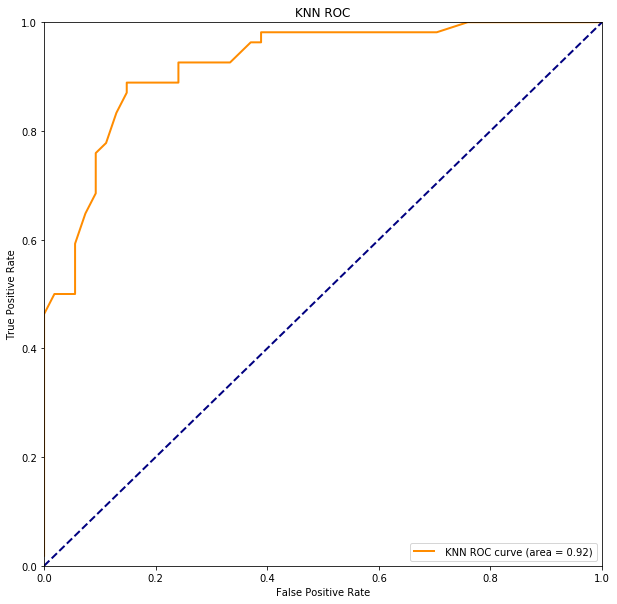

<Figure size 432x288 with 0 Axes>

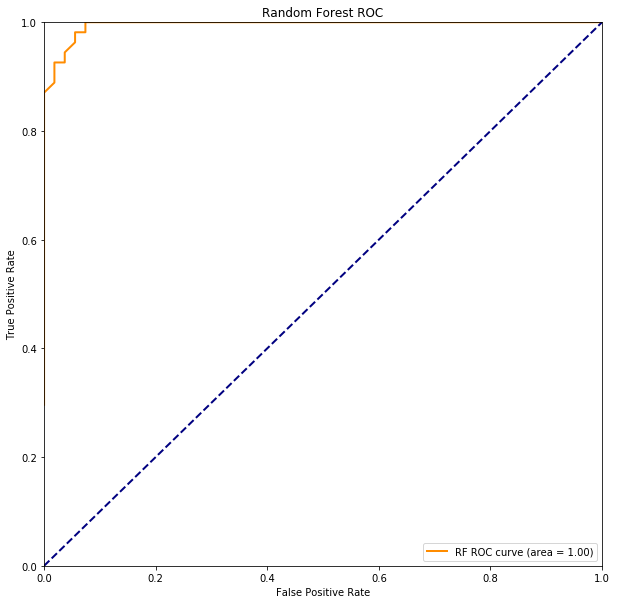

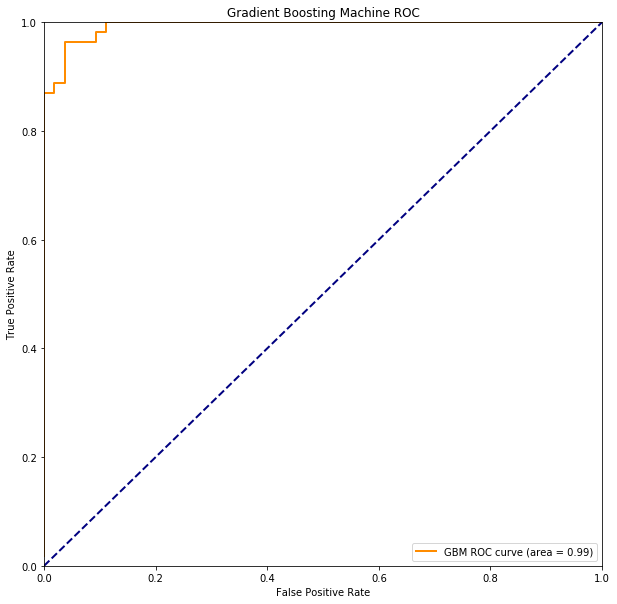

KNN Accuracy ingame: 0.8575000000000004
Random Forest Accuracy ingame: 0.9560185185185187
Gradient Boosting Machine Accuracy ingame: 0.9558333333333334


In [9]:
knn_ans = 0
bayes_ans = 0
gbm_ans = 0
rf_ans = 0

knn = KNeighborsClassifier(n_neighbors=100)
rf = RandomForestClassifier(n_estimators=40, bootstrap=True, oob_score=True, criterion='gini')
gbm = GradientBoostingClassifier(n_estimators=50)

for i in range (0,100):
    x_train, x_test, y_train, y_test = train_test_split(in_match, in_match_result, test_size=0.1, random_state=i)
    # knn
    knn.fit(x_train, y_train)
    knn_y_predict = knn.predict(x_test)
    knn_probility = knn.predict_proba(x_test)
    knn_score = knn.score(x_test, y_test, sample_weight=None)
    knn_ans += knn_score

    if i == 63:
        fpr, tpr, threshold = roc_curve(y_test, knn_probility[:, 1])  ###Calculate False Positive Rate and True Positive Rate
        roc_auc = auc(fpr, tpr)  ###Calculate Area Under Curve value

        plt.figure()
        lw = 2
        plt.figure(figsize=(10, 10))
        plt.plot(fpr, tpr, color='darkorange',
                 lw=lw, label=' KNN ROC curve (area = %0.2f)' % roc_auc)  
        ###Set False Positive Rate as x-coordinate, True Positive Rate as y-coordinate, and then plot the curve
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.00])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('KNN ROC')
        plt.legend(loc="lower right")
        plt.show()

    # random forest
    rf.fit(x_train, y_train)
    rf_y_predict = rf.predict(x_test)
    rf_probility = rf.predict_proba(x_test)
    rf_score = rf.score(x_test, y_test, sample_weight=None)
    rf_ans += rf_score

    if i == 63:
        fpr, tpr, threshold = roc_curve(y_test, rf_probility[:, 1])  ###Calculate False Positive Rate and True Positive Rate
        roc_auc = auc(fpr, tpr)  ###Calculate Area Under Curve value

        plt.figure()
        lw = 2
        plt.figure(figsize=(10, 10))
        plt.plot(fpr, tpr, color='darkorange',
                 lw=lw, label='RF ROC curve (area = %0.2f)' % roc_auc)  
        ###Set False Positive Rate as x-coordinate, True Positive Rate as y-coordinate, and then plot the curve
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Random Forest ROC')
        plt.legend(loc="lower right")
        plt.show()

    # gradient boosting machine
    gbm.fit(x_train, y_train)
    y_gbm = gbm.predict(x_test)
    gbm_probility = gbm.predict_proba(x_test)
    gbm_score = gbm.score(x_test, y_test, sample_weight=None)
    gbm_ans += gbm_score

    if i == 63:
        fpr, tpr, threshold = roc_curve(y_test, gbm_probility[:, 1])  ###Calculate False Positive Rate and True Positive Rate
        roc_auc = auc(fpr, tpr)  ###Calculate Area Under Curve value


        lw = 2
        plt.figure(figsize=(10, 10))
        plt.plot(fpr, tpr, color='darkorange',
                 lw=lw, label='GBM ROC curve (area = %0.2f)' % roc_auc)  
        ###Set False Positive Rate as x-coordinate, True Positive Rate as y-coordinate, and then plot the curve
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Gradient Boosting Machine ROC')
        plt.legend(loc="lower right")
        plt.show()



knn_ans /= 100
bayes_ans /= 100
rf_ans /= 100
gbm_ans /= 100

print ('KNN Accuracy ingame:', knn_ans)

print ('Random Forest Accuracy ingame:', rf_ans)
print ('Gradient Boosting Machine Accuracy ingame:', gbm_ans)

We collect 1077 matches as data, each match data contains in-game data, including damage dealed, gold earned kill-death ratio, first blood, first inhibitor, first tower ,dragon killed, baron killed, total tower destoried when the game ends. When calculate the accuracy, we pick 90% data are training set and 10% data as test set. We do this 100 times by randomly picking the test set to make the result more reliable.

Like before, we calculate the difference of all the features between two teams. These are almost all the features we can get for a game. Using these information we can almost predict the outcome of the match.

The KNN method shows a prediction accuracy of 85.75%, Random Forests shows a prediction accuracy of 95.60% and Gradient Boosting Machine shows a prediction accuracy of 95.58%. For the Random Forests method and the Gradient Boosting Machine method, the results are all more than 95%. Why we know all the information but we cannot make it close to 100%? Because when the game comes to 40 or 50 minutes, the influence of these feature will be less and less. All the player will have the best item around 45 minutes, even if he had disadvantages in line early of the game. So if any team win a team fighting, they will win the game. 95% is pretty a reasonable result for in-game data. As for the KNN method, the result is only 85% accuracy. I think the reason is KNN method doesn't have weight for each feature, and we didn't normalize the data, so the damage will take advantage in these feature, but it is really not that important. So the result is not as good as it should be.

We also draw ROC curves for each method, you can see this in the result.